<a href="https://colab.research.google.com/github/AbdusSattar2025/Assignments/blob/main/CIC_1st_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Load and unpack the QM9 dataset

In [ ]:
# import that pandas library
import pandas as pd

# load the dataframe as CSV fromURL.
df = pd.read_csv("http://deepchemdata.s3-us-west-1.amazonaws.com/datasets/qm9.csv")

# look at the top 5 entries
df.head()


,mol_id,smiles,A,B,C,mu,alpha,homo,lumo,gap,...,zpve,u0,u298,h298,g298,cv,u0_atom,u298_atom,h298_atom,g298_atom
0,gdb_1,C,157.71180,157.709970,157.706990,0.0000,13.21,-0.3877,0.1171,0.5048,...,0.044749,-40.478930,-40.476062,-40.475117,-40.498597,6.469,-395.999595,-398.643290,-401.014647,-372.471772
1,gdb_2,N,293.60975,293.541110,191.393970,1.6256,9.46,-0.2570,0.0829,0.3399,...,0.034358,-56.525887,-56.523026,-56.522082,-56.544961,6.316,-276.861363,-278.620271,-280.399259,-259.338802
2,gdb_3,O,799.58812,437.903860,282.945450,1.8511,6.31,-0.2928,0.0687,0.3615,...,0.021375,-76.404702,-76.401867,-76.400922,-76.422349,6.002,-213.087624,-213.974294,-215.159658,-201.407171
3,gdb_4,C#C,0.00000,35.610036,35.610036,0.0000,16.28,-0.2845,0.0506,0.3351,...,0.026841,-77.308427,-77.305527,-77.304583,-77.327429,8.574,-385.501997,-387.237686,-389.016047,-365.800724
4,gdb_5,C#N,0.00000,44.593883,44.593883,2.8937,12.99,-0.3604,0.0191,0.3796,...,0.016601,-93.411888,-93.409370,-93.408425,-93.431246,6.278,-301.820534,-302.906752,-304.091489,-288.720028


# Analyzing the dataset

In [ ]:
# install rdkit
!pip install rdkit


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.1/36.1 MB 52.3 MB/s eta 0:00:00


In [ ]:
# import the chem library for converting SMILES into RDkit molecules
from rdkit import Chem

# we will use MolToGridImage to visualize the 2D structure
from rdkit.Chem.Draw import MolsMatrixToGridImage


In [ ]:
df.tail(1)


,mol_id,smiles,A,B,C,mu,alpha,homo,lumo,gap,...,zpve,u0,u298,h298,g298,cv,u0_atom,u298_atom,h298_atom,g298_atom
133884,gdb_133885,C1N2C3C4C5OC13C2C45,3.64015,2.21764,1.93793,0.8626,69.48,-0.2316,0.0742,0.3058,...,0.127862,-400.633052,-400.627892,-400.626948,-400.662186,23.434,-1603.471865,-1614.455155,-1623.345075,-1492.24715


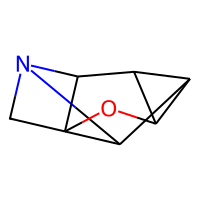

In [ ]:
from re import M
# create the molecule object
mol = Chem.MolFromSmiles("C1N2C3C4C5OC13C2C45")

# draw the structure
MolsMatrixToGridImage([[mol]])

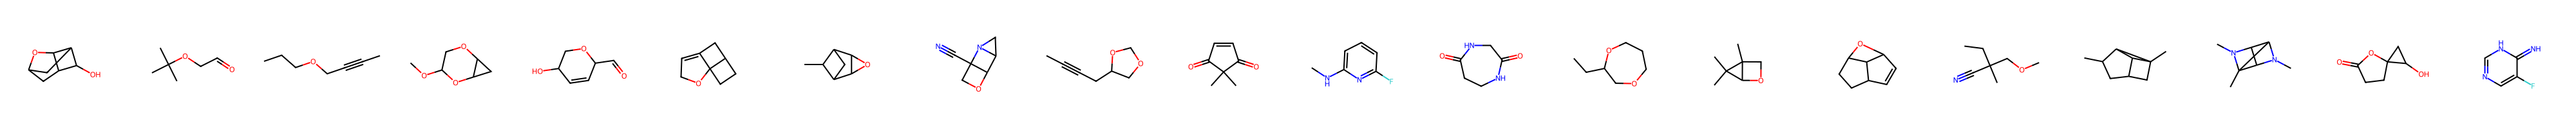

In [ ]:
# randomly select 20 entries from the dataframe
sample_df = df.sample(n=20)

# create a list of smiles
smiles_list = sample_df["smiles"].tolist()

# create the RDKit molecule objects and filter out None values
mols = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]
valid_mols = [mol for mol in mols if mol is not None]

# draw the structures
MolsMatrixToGridImage([valid_mols])

# Plotting histograms for all properties
###### A, B, C → Atom indices used for geometric information (bond lengths, angles, torsions).
######mu → Dipole Moment (Debye, D)
######alpha → Isotropic Polarizability (Bohr³)
######homo → HOMO Energy
######lumo → LUMO Energy
######gap → HOMO–LUMO Gap
######r2 → Electronic Spatial Extent (Bohr²) (size of the electron distribution)
######zpve → Zero-Point Vibrational Energy
######u0 → Internal energy at 0 K
######u298 → Internal energy at 298.15 K (room temp)
######h298 → Enthalpy at 298.15 K
######g298 → Gibbs Free Energy at 298.15 K
######cv→Heat Capacity

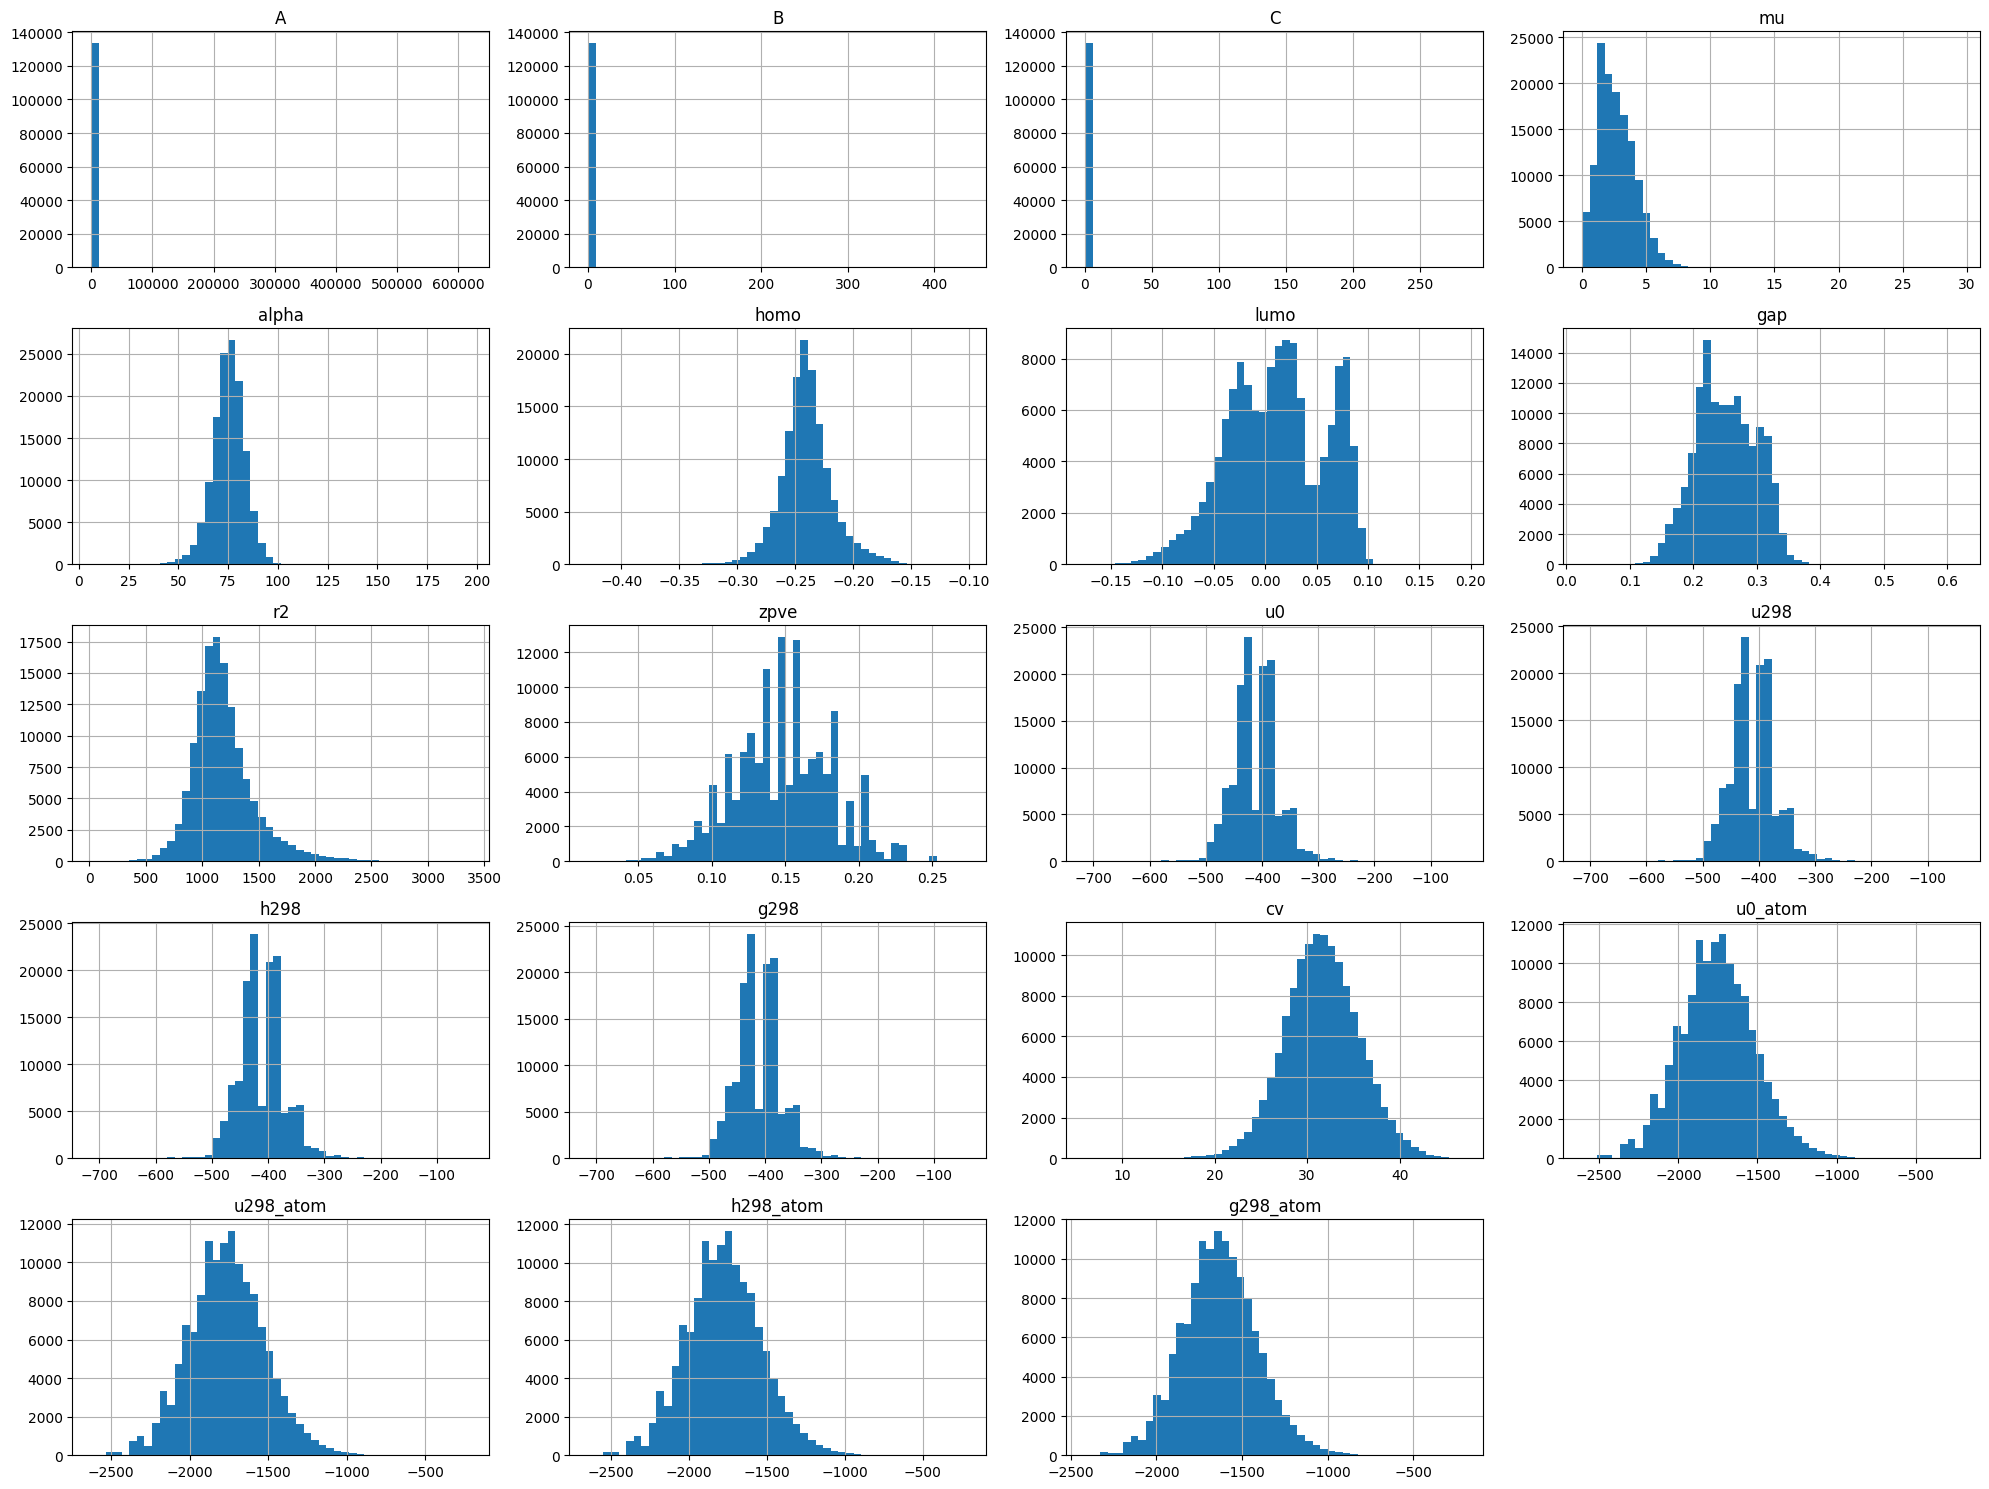

In [ ]:
# @title
import matplotlib.pyplot as plt

# Select numerical columns (excluding the 'mol_id' and 'smiles' as they are not numerical)
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()



# Plot histograms for each numerical column
df[numerical_cols].hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.show()

## Calculate molecular composition and size
A function to parse the SMILES string and count the number of atoms of each element and the total number of atoms. Apply this function to the 'smiles' column of the dataframe to create new columns for each element count and the total atom count.


In [ ]:
def count_molecular_composition(smiles):
    """
    Parses a SMILES string and counts the number of atoms of each element
    and the total number of atoms.

    Args:
        smiles: The SMILES string of a molecule.

    Returns:
        A tuple containing a dictionary of element counts and the total atom count,
        or (None, None) if the SMILES string is invalid.
    """
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None, None

    element_counts = {}
    total_atoms = 0
    for atom in mol.GetAtoms():
        symbol = atom.GetSymbol()
        element_counts[symbol] = element_counts.get(symbol, 0) + 1
        total_atoms += 1

    return element_counts, total_atoms

# Apply the function to the 'smiles' column
composition_results = df['smiles'].apply(count_molecular_composition)

# Separate the element counts and total atom count into new columns
df['element_counts'], df['total_atoms'] = zip(*composition_results)

# Expand the element_counts dictionary into separate columns
element_df = pd.json_normalize(df['element_counts'])

# Rename the element count columns to be more descriptive
element_df.columns = [f'{col}_count' for col in element_df.columns]

# Concatenate the new element count columns with the original dataframe
df = pd.concat([df, element_df], axis=1)

# Drop the intermediate 'element_counts' column
df = df.drop(columns=['element_counts'])

# Fill NaN values in the newly created element count columns with 0
df[element_df.columns] = df[element_df.columns].fillna(0)

display(df.head())

,mol_id,smiles,A,B,C,mu,alpha,homo,lumo,gap,...,cv,u0_atom,u298_atom,h298_atom,g298_atom,total_atoms,C_count,N_count,O_count,F_count
0,gdb_1,C,157.71180,157.709970,157.706990,0.0000,13.21,-0.3877,0.1171,0.5048,...,6.469,-395.999595,-398.643290,-401.014647,-372.471772,1,1.0,0.0,0.0,0.0
1,gdb_2,N,293.60975,293.541110,191.393970,1.6256,9.46,-0.2570,0.0829,0.3399,...,6.316,-276.861363,-278.620271,-280.399259,-259.338802,1,0.0,1.0,0.0,0.0
2,gdb_3,O,799.58812,437.903860,282.945450,1.8511,6.31,-0.2928,0.0687,0.3615,...,6.002,-213.087624,-213.974294,-215.159658,-201.407171,1,0.0,0.0,1.0,0.0
3,gdb_4,C#C,0.00000,35.610036,35.610036,0.0000,16.28,-0.2845,0.0506,0.3351,...,8.574,-385.501997,-387.237686,-389.016047,-365.800724,2,2.0,0.0,0.0,0.0
4,gdb_5,C#N,0.00000,44.593883,44.593883,2.8937,12.99,-0.3604,0.0191,0.3796,...,6.278,-301.820534,-302.906752,-304.091489,-288.720028,2,1.0,1.0,0.0,0.0


## Plot histograms for element counts

Select the newly created columns for element counts and plot histograms for each of them.


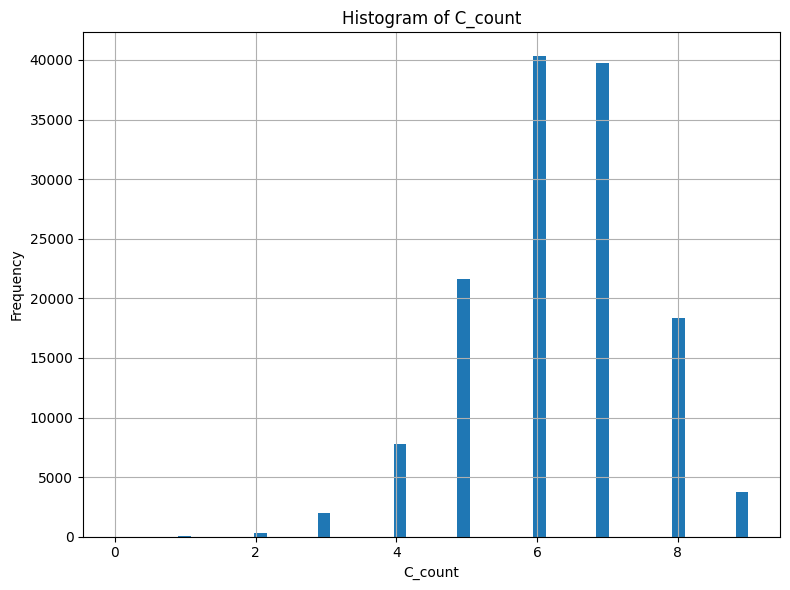

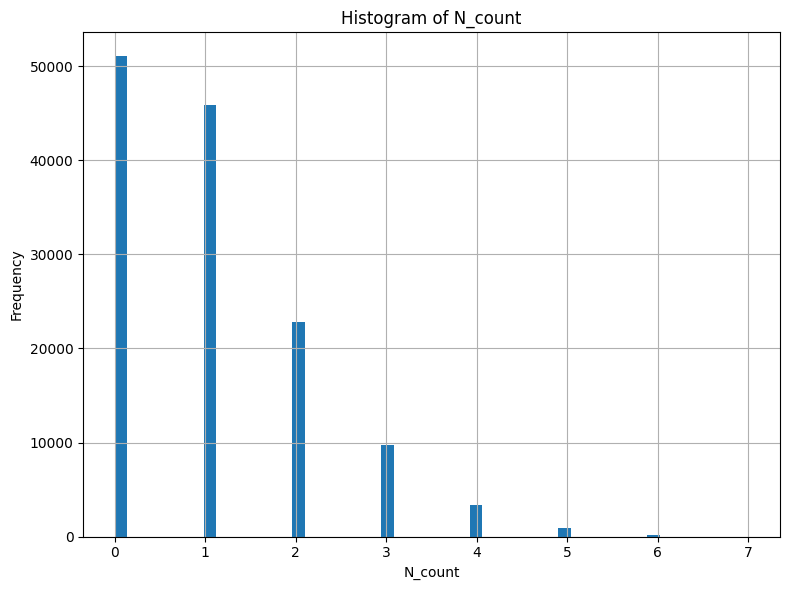

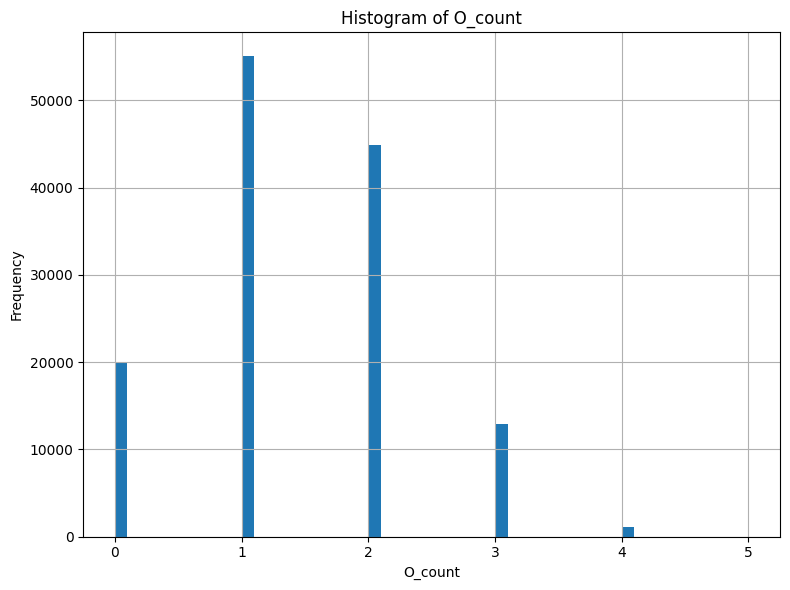

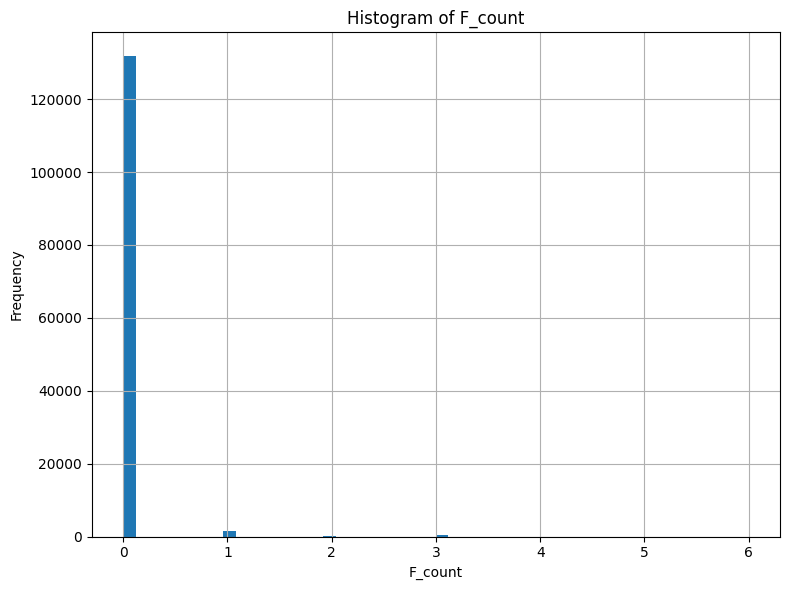

In [ ]:
# Identify columns with element counts (those ending with '_count')
element_count_cols = [col for col in df.columns if col.endswith('_count')]

# Plot histograms for each element count column
for col in element_count_cols:
    plt.figure(figsize=(8, 6))
    df[col].hist(bins=50)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

## Plot histogram for total atom count



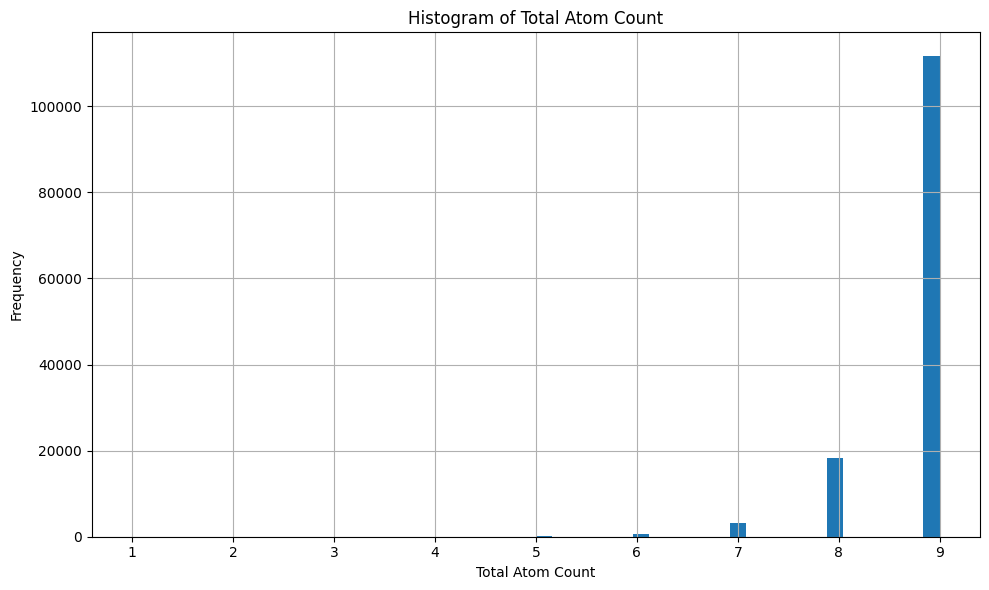

In [ ]:
plt.figure(figsize=(10, 6))
df['total_atoms'].hist(bins=50)
plt.title('Histogram of Total Atom Count')
plt.xlabel('Total Atom Count')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

## Calculate molecular weight

The molecular weight from the SMILES string and apply it to the dataframe to create a new column for molecular weight.


In [ ]:
from rdkit.Chem import Descriptors

def calculate_molecular_weight(smiles):
    """
    Calculates the molecular weight from a SMILES string.

    Args:
        smiles: The SMILES string of a molecule.

    Returns:
        The molecular weight, or None if the SMILES string is invalid.
    """
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    return Descriptors.MolWt(mol)

# Apply the function to the 'smiles' column
df['molecular_weight'] = df['smiles'].apply(calculate_molecular_weight)

display(df.head())

,mol_id,smiles,A,B,C,mu,alpha,homo,lumo,gap,...,u0_atom,u298_atom,h298_atom,g298_atom,total_atoms,C_count,N_count,O_count,F_count,molecular_weight
0,gdb_1,C,157.71180,157.709970,157.706990,0.0000,13.21,-0.3877,0.1171,0.5048,...,-395.999595,-398.643290,-401.014647,-372.471772,1,1.0,0.0,0.0,0.0,16.043
1,gdb_2,N,293.60975,293.541110,191.393970,1.6256,9.46,-0.2570,0.0829,0.3399,...,-276.861363,-278.620271,-280.399259,-259.338802,1,0.0,1.0,0.0,0.0,17.031
2,gdb_3,O,799.58812,437.903860,282.945450,1.8511,6.31,-0.2928,0.0687,0.3615,...,-213.087624,-213.974294,-215.159658,-201.407171,1,0.0,0.0,1.0,0.0,18.015
3,gdb_4,C#C,0.00000,35.610036,35.610036,0.0000,16.28,-0.2845,0.0506,0.3351,...,-385.501997,-387.237686,-389.016047,-365.800724,2,2.0,0.0,0.0,0.0,26.038
4,gdb_5,C#N,0.00000,44.593883,44.593883,2.8937,12.99,-0.3604,0.0191,0.3796,...,-301.820534,-302.906752,-304.091489,-288.720028,2,1.0,1.0,0.0,0.0,27.026


## Select relevant columns

Select all numerical columns, including the newly created 'total_atoms' and 'molecular_weight' columns, for correlation analysis.


In [ ]:
# Select numerical columns (including the newly created ones)
numerical_cols_for_correlation = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Ensure 'total_atoms' and 'molecular_weight' are in the list (they should be if they are int or float)
if 'total_atoms' not in numerical_cols_for_correlation:
    numerical_cols_for_correlation.append('total_atoms')
if 'molecular_weight' not in numerical_cols_for_correlation:
    numerical_cols_for_correlation.append('molecular_weight')

# Display the list of selected columns to verify
print("Selected numerical columns for correlation analysis:")
print(numerical_cols_for_correlation)

Selected numerical columns for correlation analysis:
['A', 'B', 'C', 'mu', 'alpha', 'homo', 'lumo', 'gap', 'r2', 'zpve', 'u0', 'u298', 'h298', 'g298', 'cv', 'u0_atom', 'u298_atom', 'h298_atom', 'g298_atom', 'total_atoms', 'C_count', 'N_count', 'O_count', 'F_count', 'molecular_weight']


## Calculate correlation matrix
pairwise correlation between the selected columns.


In [ ]:
# Select the subset of the DataFrame containing only the columns listed in numerical_cols_for_correlation
df_subset = df[numerical_cols_for_correlation]

# Calculate the pairwise correlation matrix
correlation_matrix = df_subset.corr()

# Display the correlation matrix
display(correlation_matrix)

,A,B,C,mu,alpha,homo,lumo,gap,r2,zpve,...,u0_atom,u298_atom,h298_atom,g298_atom,total_atoms,C_count,N_count,O_count,F_count,molecular_weight
A,1.000000,0.000580,0.001205,-0.006165,0.004054,-0.000753,-0.005566,-0.005148,-0.001460,-0.010697,...,0.010766,0.010779,0.010786,0.010644,-0.016096,0.000385,-0.003257,-0.005659,-0.000415,-0.020126
B,0.000580,1.000000,0.980884,-0.025980,-0.174341,0.019439,0.023607,0.014266,-0.266971,-0.090057,...,0.124428,0.123843,0.123791,0.125178,-0.216568,-0.064024,-0.004063,-0.029979,0.003564,-0.219651
C,0.001205,0.980884,1.000000,-0.049102,-0.177211,0.005981,0.064483,0.060909,-0.280177,-0.066625,...,0.107345,0.106626,0.106548,0.108399,-0.237379,-0.034641,-0.040320,-0.035817,-0.006972,-0.242337
mu,-0.006165,-0.025980,-0.049102,1.000000,-0.241122,-0.101495,-0.385425,-0.333429,0.010921,-0.373648,...,0.348358,0.349069,0.349192,0.347062,0.041232,-0.392410,0.368138,0.120355,0.002753,0.052671
alpha,0.004054,-0.174341,-0.177211,-0.241122,1.000000,0.240317,0.304863,0.189200,0.556891,0.732357,...,-0.833088,-0.832279,-0.831908,-0.837069,0.545521,0.783725,-0.235185,-0.453246,-0.194718,0.385219
homo,-0.000753,0.019439,0.005981,-0.101495,0.240317,1.000000,0.209267,-0.259035,-0.099357,0.131028,...,-0.124421,-0.124949,-0.124921,-0.123212,0.095272,0.099830,0.133495,-0.234484,-0.071056,0.032089
lumo,-0.005566,0.023607,0.064483,-0.385425,0.304863,0.209267,1.000000,0.890274,0.014946,0.654120,...,-0.560599,-0.562027,-0.562539,-0.554313,-0.042312,0.439156,-0.346154,-0.199364,-0.063041,0.007097
gap,-0.005148,0.014266,0.060909,-0.333429,0.189200,-0.259035,0.890274,1.000000,0.061032,0.585073,...,-0.495776,-0.496940,-0.497459,-0.490130,-0.086169,0.387278,-0.404084,-0.087715,-0.029175,-0.007941
r2,-0.001460,-0.266971,-0.280177,0.010921,0.556891,-0.099357,0.014946,0.061032,1.000000,0.379363,...,-0.433016,-0.431245,-0.431319,-0.434454,0.407184,0.205761,-0.071711,0.041565,-0.036053,0.462909
zpve,-0.010697,-0.090057,-0.066625,-0.373648,0.732357,0.131028,0.654120,0.585073,0.379363,1.000000,...,-0.966789,-0.967303,-0.967646,-0.963083,0.242132,0.704608,-0.482244,-0.212582,-0.180401,0.295085


## Visualize correlation matrix

Visualize the correlation matrix using a heatmap for better understanding of the relationships.


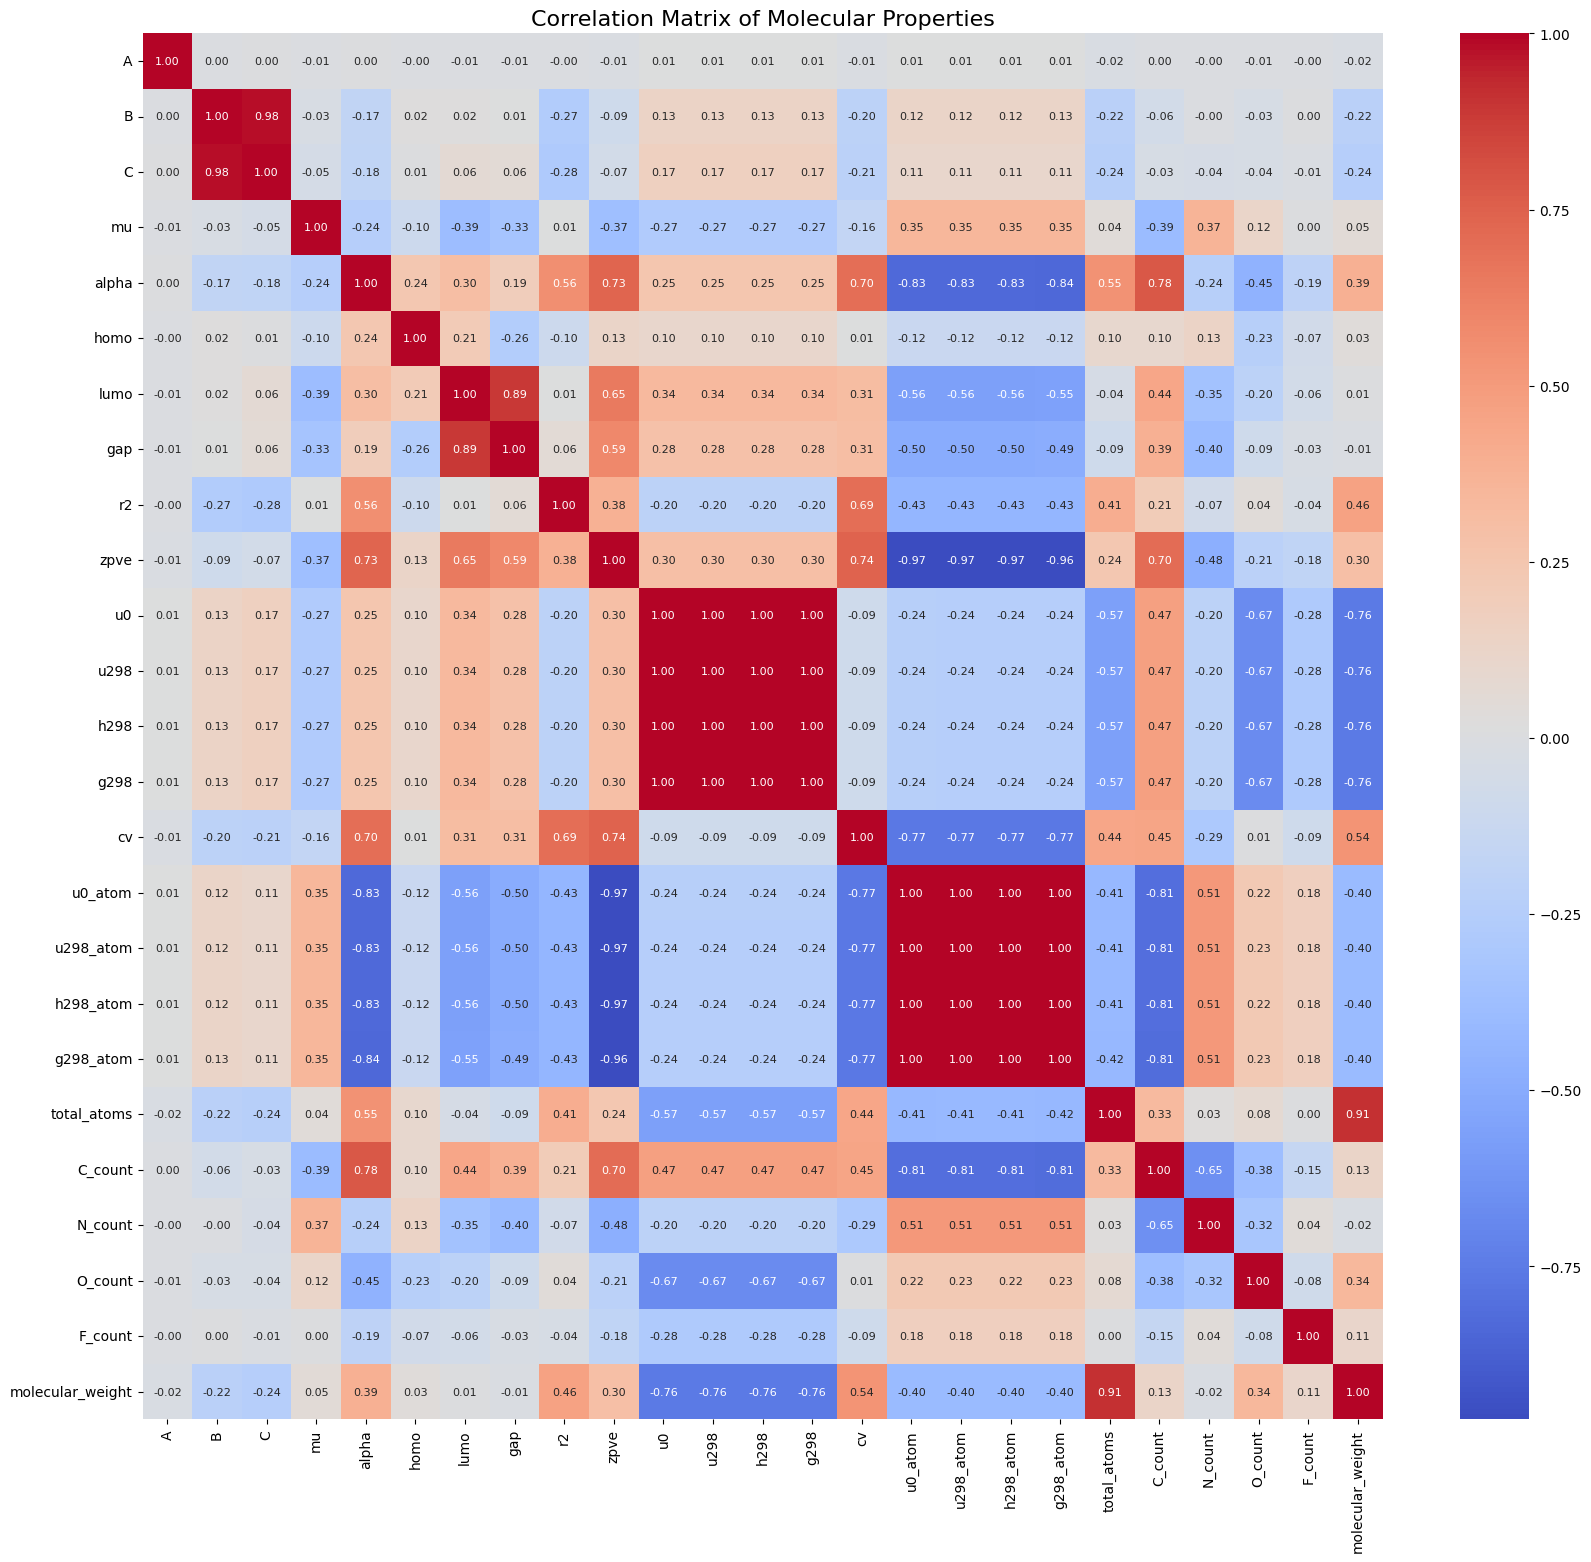

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Adjust figure size for better readability
plt.figure(figsize=(20, 18))

# Create a heatmap of the correlation matrix with annotations
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8})

# Set the title of the heatmap
plt.title('Correlation Matrix of Molecular Properties', fontsize=16)

# Display the heatmap
plt.show()